## Verification of the datum shift of xDEM

In [1]:
import xdem
dem_NN2000 = xdem.DEM('no_kv_HREF2018B_NN2000_EUREF89.tif')

In [2]:
dem_NN2000

xdem.dem.DEM(| 0.04, 0.00, 3.98|
| 0.00,-0.02, 72.01|
| 0.00, 0.00, 1.00|, EPSG:4937, nan, (0.04, 0.020000000000000004), BoundingBox(left=3.98, bottom=57.790000000000006, right=32.019999999999996, top=72.01), 711, 701, (711, 701), (1,), 1, <built-in method dataset_mask of DatasetReader object at 0x00000232C6F8EA40>, GTiff, ('float32',), no_kv_HREF2018B_NN2000_EUREF89.tif)

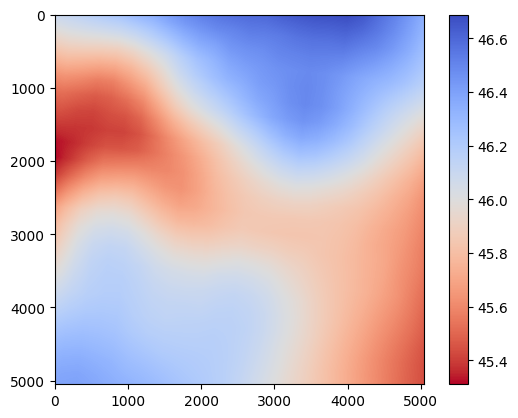

In [4]:
dem_file = 'C:\\Users\\zhihaol\\OneDrive - Universitetet i Oslo\\xsnow\\demo\\dtm10_6700_2_10m_z33.tif'
dem = xdem.DEM(dem_file)

# visulize Datumgrid 
dem_NN2000_int = dem_NN2000.reproject(dem,resampling='bilinear') 

import matplotlib.pyplot as plt
plt.imshow(dem_NN2000_int.data.squeeze(), cmap="coolwarm_r")
plt.colorbar()

In [10]:
# step1: dem_1 is the dem after datum shift
dem_1 = dem_NN2000_int + dem


In [26]:
# step2: dem_00 is the dem_0 after datum shift by xDEM 

dem_file = 'C:\\Users\\zhihaol\\OneDrive - Universitetet i Oslo\\xsnow\\demo\\dtm10_6700_2_10m_z33.tif'
dem_0 = xdem.DEM(dem_file,vref_grid='no_kv_HREF2018B_NN2000_EUREF89.tif')
dem_00 = xdem.DEM(dem_file,vref_grid='no_kv_HREF2018B_NN2000_EUREF89.tif')
dem_00.to_vref(vref_name='WGS84')

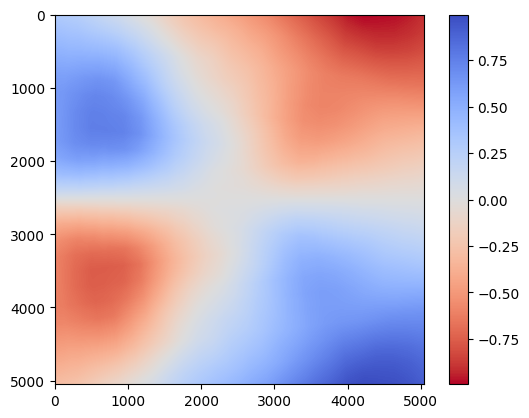

In [28]:
## step3: looks like dem_00 (xDEM shift) is not equal to (dem_1) mannul shift
import matplotlib.pyplot as plt
plt.imshow((dem_00 - dem_1).data.squeeze(), cmap="coolwarm_r")
plt.colorbar()


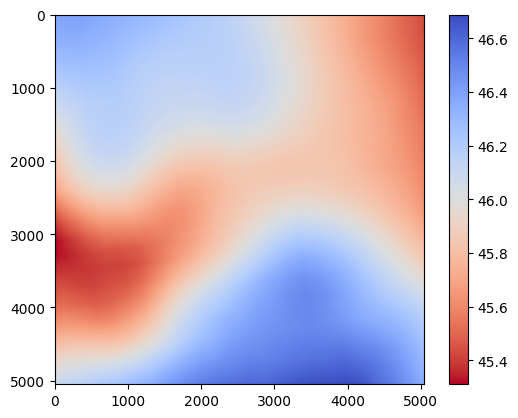

In [29]:
# step4: (dem_00-dem_0) can tell us what has been done by xdem-pyproj(step2)
import matplotlib.pyplot as plt
plt.imshow((dem_00-dem_0).data.squeeze(), cmap="coolwarm_r")
plt.colorbar()

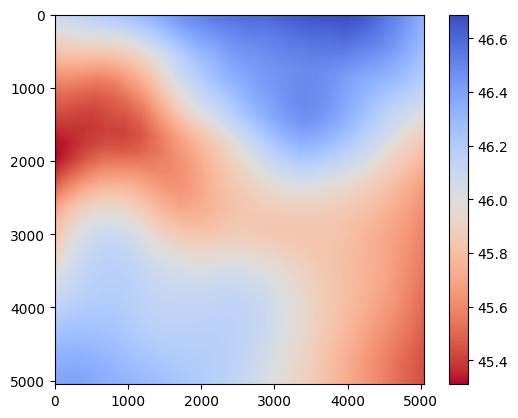

In [30]:
# step5: (dem_1-dem) can tell us what has been done by simpliy stacking dem(step1)
# we can tell the y-axis is upside down
plt.imshow((dem_1-dem).data.squeeze(), cmap="coolwarm_r")
plt.colorbar()